In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load dataset
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Basic Dataset Inspection
df.info()
df.describe()
df.isnull().sum()
#No missing values.Zero values present in Glucose, BloodPressure, SkinThickness, Insulin, BMI

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#Replace Invalid Zeros with Median
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

for col in cols:
    df[col] = df[col].replace(0, df[col].median())


In [5]:
#Define Features (X) and Target (Y)
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]


In [ ]:
Data Set Overview:
   *Independent variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
   *Dependent variable: Outcome

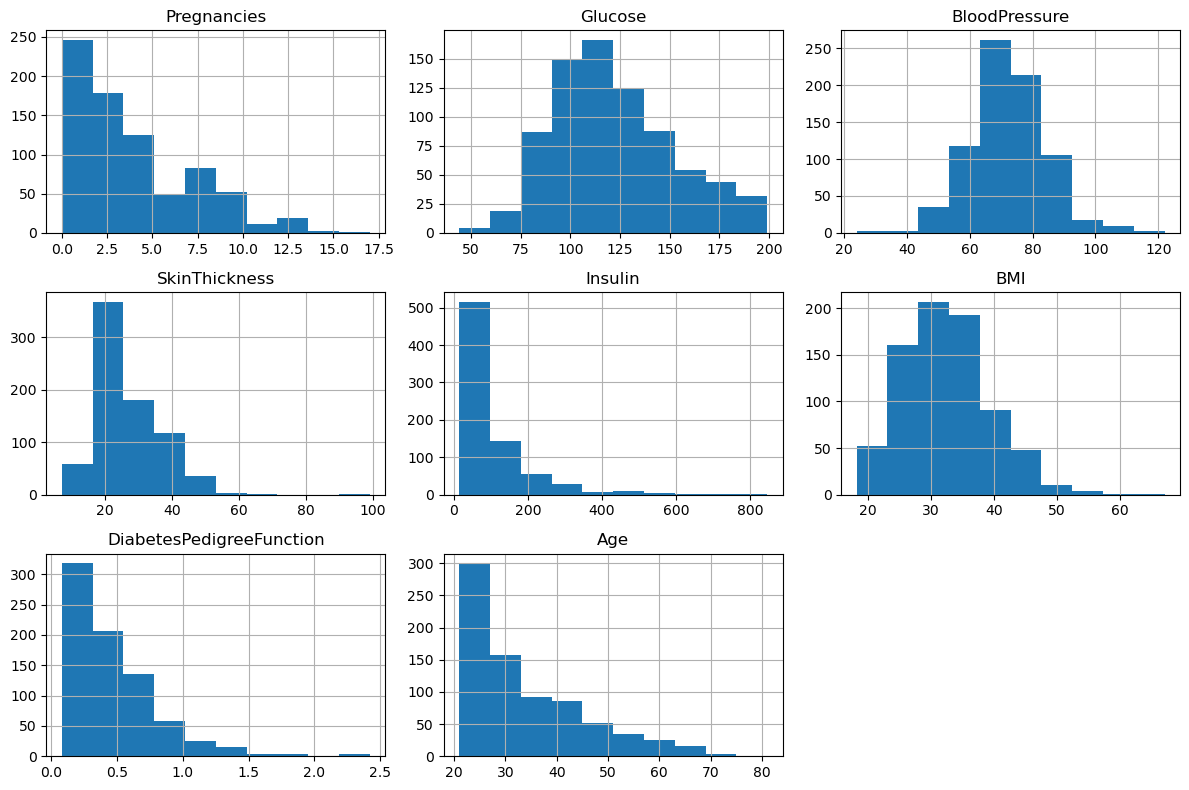

In [6]:
#Histogram for skewness 
X.hist(figsize=(12,8))
plt.tight_layout()
plt.show()


In [ ]:
Visualizations & Observations:
      *Glucose, BMI, and Age show right-skewed distributions, indicating that higher values occur less frequently but are important for distinguishing 
diabetic cases.
      *Insulin and SkinThickness contain a large number of zero values and strong skewness, suggesting possible missing or unrecorded measurements
rather than true zeros.
      *Pregnancies is positively skewed, with most individuals having fewer pregnancies, while higher counts are relatively rare.
      *DiabetesPedigreeFunction is heavily right-skewed.

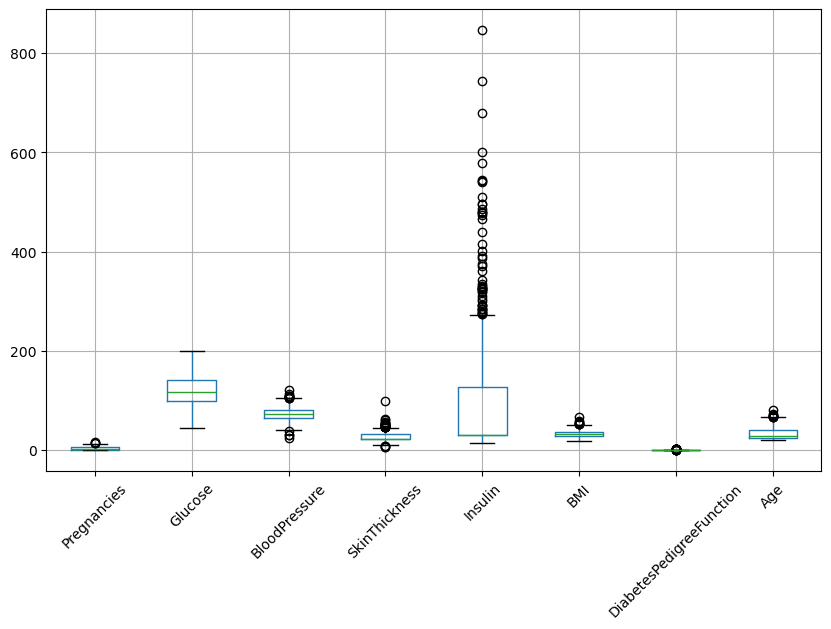

In [7]:
#Boxplot (Outliers Detection)
plt.figure(figsize=(10,6))
X.boxplot()
plt.xticks(rotation=45)
plt.show()

In [ ]:
Boxplot Intrepetations:
   *Insulin and SkinThickness have many outliers and zero values.
   *BMI and Glucose also show moderate outliers.
   *Indicates the need for outlier treatment before modeling.

In [8]:
#Outlier Treatment (IQR Capping)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

X = X.clip(lower=lower, upper=upper, axis=1)


In [25]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


In [26]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    C=1.0,
    penalty="l2",
    solver="liblinear",
    class_weight="balanced"
)

model.fit(X_train, Y_train)


LogisticRegression(class_weight='balanced', solver='liblinear')

In [27]:
#Predictions
Y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)[:,1]


In [116]:
#Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score,classification_report, confusion_matrix
)

print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_prob))


Accuracy: 0.7857142857142857
Precision: 0.6615384615384615
Recall: 0.7962962962962963
F1 Score: 0.7226890756302521
ROC AUC: 0.8264814814814814


In [117]:
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


Confusion Matrix:
 [[78 22]
 [11 43]]


In [ ]:
Interpretation on Model:
    *Recall score,accuracy,Specificity score,f1 score and AUC score are lies in range between 0.6 to 0.8.
    *Its seems to be not a good model to fit it.
    *It may be arises due to overfit model or underfit model.
    *It will be analysed by using after cross validation.Then identify whether it is a overfit or underfit.
    *Then do any other classification model to improve accuracy.

In [118]:
#LogiticRegression using shufflesplit
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    class_weight="balanced",
    C=1.0,
    penalty="l2",
    solver="liblinear",
)


# Set up ShuffleSplit cross-validator
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=20, test_size=0.3, random_state=42)

# Perform cross-validation and collect both train and test scores
cv_results = cross_validate(model, X, Y, cv=shuffle_split, scoring='accuracy', return_train_score=True)

# Extract train and test scores
train_scores = cv_results['train_score']
test_scores = cv_results['test_score']

# Show individual scores and their means
print("cross validation: train accuracy:" , np.round(train_scores.mean(),2))
print("cross validation: test accuracy:" , np.round(test_scores.mean(),2))

cross validation: train accuracy: 0.76
cross validation: test accuracy: 0.76


In [ ]:
n-split    Train Accuracy    Test aaccuracy
150         77                 75
100         77                 75
80          76                 75
50          76                 76
20          76                 76

Summary for Cross Validation:
    *As tunning tha parameters we got a different results.
    *Analaysis all the values,n-split = 20 got an accuraccy of train and test as 76 & 76.
    *More no of split if we used it takes more run time,So we choose n-split as 20 to reduce model time and model becomes faster.

In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [129]:
#XGB Classifier

from xgboost import XGBClassifier
xgb_model = XGBClassifier( gamma = 8, learning_rate = 0.1, n_estimators = 20, reg_lambda =  5,random_state=42 ) 

xgb_model.fit(X_train, Y_train)

y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

training_accuracy_xgb = accuracy_score(Y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(Y_test, y_pred_test_xgb)

print("xgb classifier - Training Accuracy:", np.round(training_accuracy_xgb,2))
print("xgb classifier - Test Accuracy:", np.round(test_accuracy_xgb,2))

xgb classifier - Training Accuracy: 0.79
xgb classifier - Test Accuracy: 0.74


In [111]:
#XGBM using GridSearch Cv

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [20,50, 100],
    'gamma': [4,6,8],
    'reg_lambda': [1,3,5],
    'learning_rate': [0.1, 1,3]
}

from xgboost import XGBClassifier
xgb_model = XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test_best = best_rf_model.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

Best hyperparameters: {'gamma': 8, 'learning_rate': 0.1, 'n_estimators': 20, 'reg_lambda': 5}
Best score: 0.7720511795281888
Test accuracy of best model: 0.7402597402597403


In [101]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [134]:
#LightGBM 

from lightgbm import LGBMClassifier


lgbm_model =LGBMClassifier(gamma = 4, learning_rate= 0.1, n_estimators=20, reg_lambda=5)

lgbm_model.fit(X_train, Y_train)

y_pred_train_lgbm = lgbm_model.predict(X_train)
y_pred_test_lgbm = lgbm_model.predict(X_test)

training_accuracy_lgbm = accuracy_score(Y_train, y_pred_train_lgbm)
test_accuracy_lgbm = accuracy_score(Y_test, y_pred_test_lgbm)

print("LGBM Classifier - Training Accuracy:", np.round(training_accuracy_lgbm, 2))
print("LGBM Classifier - Test Accuracy:", np.round(test_accuracy_lgbm, 2))

LGBM Classifier - Training Accuracy: 0.84
LGBM Classifier - Test Accuracy: 0.77


In [120]:
#LGBM using GridSearch CV

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [20,50, 100],
    'gamma': [4,6,8],
    'reg_lambda': [1,4,5],
    'learning_rate': [0.1,2,3]
}

lgbm_model = LGBMClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the best score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred_test_best = best_rf_model.predict(X_test)
test_accuracy_best = accuracy_score(Y_test, y_pred_test_best)
print("Test accuracy of best model:", test_accuracy_best)

Best hyperparameters: {'gamma': 4, 'learning_rate': 0.1, 'n_estimators': 20, 'reg_lambda': 5}
Best score: 0.7622684259629482
Test accuracy of best model: 0.7662337662337663


In [135]:
print("LGBM_Accuracy:", accuracy_score(Y_test, y_pred_test_lgbm))
print("LGBM_Precision:", precision_score(Y_test, y_pred_test_lgbm))
print("LGBM_Recall:", recall_score(Y_test, y_pred_test_lgbm))

LGBM_Accuracy: 0.7662337662337663
LGBM_Precision: 0.7045454545454546
LGBM_Recall: 0.5740740740740741


In [ ]:
LightGBM (LGBM)
   *Higher Accuracy (0.766) ->Better overall correctness
   *Higher Precision (0.705) -> Fewer false positives
   *Higher Recall (0.574) -> Better at identifying positive cases
   *Strength: Balanced and more reliable predictions
   *Weakness: Recall is moderate → misses some positive cases

In [132]:
print("rgbm_Accuracy:", accuracy_score(Y_test, y_pred_test_xgb))
print("rgbm_Precision:", precision_score(Y_test, y_pred_test_xgb))
print("rgbm_Recall:", recall_score(Y_test, y_pred_test_xgb))

rgbm_Accuracy: 0.7402597402597403
rgbm_Precision: 0.6590909090909091
rgbm_Recall: 0.5370370370370371


In [ ]:
XGBoost (XGBM)
   *Lower Accuracy (0.740) ->compared to LightGBM
   *Lower Precision (0.659) -> More false positives
   *Lower Recall (0.537) -> Misses more positive cases
   *Strength: Stable performance, widely robust algorithm
   *Weakness: Slightly weaker than LightGBM on this dataset

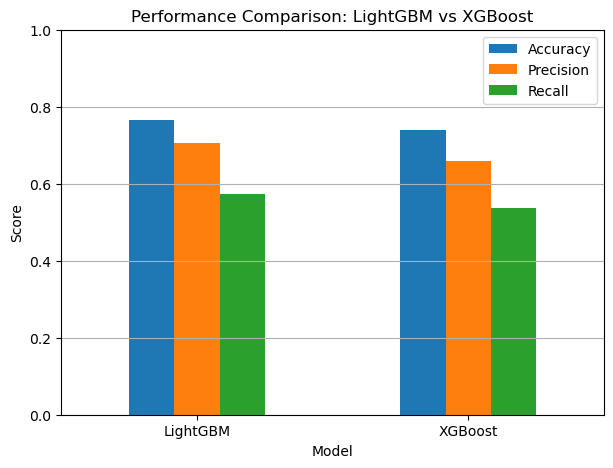

In [143]:
# Model performance results
results = pd.DataFrame({
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [0.7662337662337663, 0.7402597402597403],
    'Precision': [0.7045454545454546, 0.6590909090909091],
    'Recall': [0.5740740740740741, 0.5370370370370371]
})

results.set_index('Model').plot( kind='bar',figsize=(7,5))

plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
A brief report summarizing the comparative analysis results:

Objective:
     The objective of this study was to compare the performance of Light Gradient Boosting Machine (LightGBM) and Extreme Gradient Boosting (XGBoost) 
for a binary classification problem using standard evaluation metrics.

Interpretation of Results:
   1.LightGBM outperformed XGBoost across all evaluation metrics.
       *Higher accuracy indicates better overall predictive capability.
       *Higher precision suggests fewer false positive predictions.
       *Higher recall shows improved identification of positive class instances.
   2.XGBoost demonstrated slightly lower performance, particularly in recall, indicating that it missed more positive cases compared to LightGBM.

Strengths and Weaknesses:

  LightGBM
     Strengths: Faster training, better handling of complex feature interactions, superior performance on this dataset.
     Weaknesses: Moderate recall indicates that some positive cases are still misclassified.

  XGBoost
     Strengths: Robust and stable algorithm with strong generalization ability.
     Weaknesses: Slightly lower accuracy and recall compared to LightGBM for this problem.

Analysis:

       *For applications where overall accuracy and precision are important, LightGBM is the preferred choice.
       *In scenarios where missing positive cases is costly (e.g., medical diagnosis), recall can be further improved using threshold tuning or
class weighting.
       *Both models are suitable for real-world classification tasks, but LightGBM offers a better balance between performance and efficiency
for this dataset.

Conclusion:
      *LightGBM shows superior performance over XGBoost, particularly in accuracy and recall, making it more suitable for this binary
classification problem.
      *This indicates that LightGBM is more effective at capturing important patterns in the dataset, making it the preferred model for 
this classification task.